In [ ]:
pip install matplotlib
pip install pandas
pip install seaborn
pip install textblob

### EDA

Vamos começar lendo o arquivo e verificando os primeiros dados para saber com o que estamos trabalhando

In [42]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from textblob import TextBlob


In [4]:
df = pd.read_csv(r"..\docs\brazilian_ecommerce.csv")

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,400.0,19.0,13.0,19.0,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,420.0,24.0,19.0,21.0,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,450.0,30.0,10.0,20.0,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,250.0,51.0,15.0,15.0,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


Agora verificando o tipo de cada coluna

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114100 entries, 0 to 114099
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       114100 non-null  object 
 1   customer_id                    114100 non-null  object 
 2   order_status                   114100 non-null  object 
 3   order_purchase_timestamp       114100 non-null  object 
 4   order_approved_at              113938 non-null  object 
 5   order_delivered_carrier_date   112120 non-null  object 
 6   order_delivered_customer_date  110847 non-null  object 
 7   order_estimated_delivery_date  114100 non-null  object 
 8   order_item_id                  113322 non-null  float64
 9   product_id                     113322 non-null  object 
 10  seller_id                      113322 non-null  object 
 11  shipping_limit_date            113322 non-null  object 
 12  price                         

Aqui podemos ver as propriedades das colunas que contem valores númericos, como média, desvio padrão, máximo e mínimo.

In [15]:
df.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
count,113322.000000,113322.000000,113322.000000,111710.000000,111710.000000,111710.000000,113304.000000,113304.000000,113304.000000,113304.000000,114100.000000
mean,1.198514,120.481328,19.979641,48.777459,786.881040,2.206857,2091.970831,30.162210,16.584816,23.003645,3.999816
std,0.706993,183.277636,15.782926,10.024601,651.745733,1.719464,3749.785242,16.151345,13.439402,11.708565,1.412251
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,3.000000
50%,1.000000,74.900000,16.260000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,5.000000
75%,1.000000,134.900000,21.150000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000


Verificando se existem dados duplicados

In [36]:
duplicatas = df[df.duplicated()]

total_duplicatas = duplicatas.shape[0]

# Exibir o total de duplicatas
print(f"Total de linhas duplicadas: {total_duplicatas}")


Total de linhas duplicadas: 0


Por ultimo, verificando os valores nulos.

In [ ]:
df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   162
order_delivered_carrier_date       1980
order_delivered_customer_date      3253
order_estimated_delivery_date         0
order_item_id                       778
product_id                          778
seller_id                           778
shipping_limit_date                 778
price                               778
freight_value                       778
product_category_name              2390
product_name_lenght                2390
product_description_lenght         2390
product_photos_qty                 2390
product_weight_g                    796
product_length_cm                   796
product_height_cm                   796
product_width_cm                    796
review_id                             0
review_score                          0
review_comment_title             100386


Agora vamos utilizar técnicas para explorar os dados.

Uma das principais métricas desse dataset são as notas altas e notas baixas nos reviews, por isso vamos começar com o total de notas.

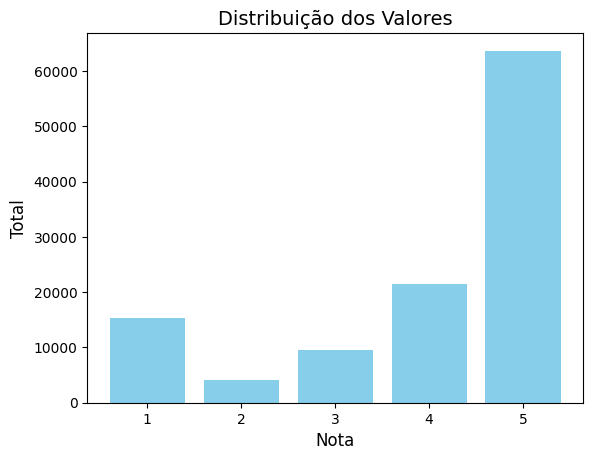

In [32]:
data = Counter(df['review_score'])

labels = list(data.keys())
values = list(data.values())

plt.bar(labels, values, color='skyblue')

plt.title('Distribuição dos Valores', fontsize=14)
plt.xlabel('Nota', fontsize=12)
plt.ylabel('Total', fontsize=12)

plt.show()

Podemos observar que mais da metade dos clientes estão completamente satisfeitos com a compra, mas precisamos entender o por que disso para criar métricas vísiveis ao cliente.<br>
Por curiosidade, vamos verificar se existe relação entre as informações do item no anúncio.



Matriz de correlação: 


,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty
review_score,1.000000,-0.004525,-0.036006,-0.005700,0.012745,0.022594
price,-0.004525,1.000000,0.414355,0.016992,0.198174,0.051957
freight_value,-0.036006,0.414355,1.000000,0.023504,0.094054,0.022651
product_name_lenght,-0.005700,0.016992,0.023504,1.000000,0.091391,0.145644
product_description_lenght,0.012745,0.198174,0.094054,0.091391,1.000000,0.118968
product_photos_qty,0.022594,0.051957,0.022651,0.145644,0.118968,1.000000


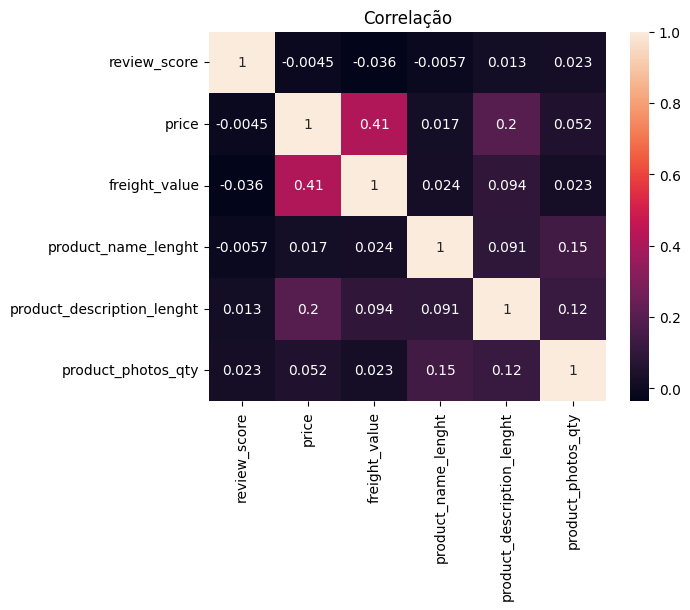

In [48]:
#Calcula a matriz de correlação para as variaveis numéricas no df, criando uma tabela de correlação
df_correlation = df[['review_score', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']].corr()

#Exibe a tabela de correlação 
print('\n\nMatriz de correlação: ')
display(df_correlation)

#Cria um mapa de calor para visualizar a matrix de correlação
sns.heatmap(df_correlation,
            annot=True,
            xticklabels=df_correlation.columns,
            yticklabels=df_correlation.columns)

plt.title('Correlação')
plt.show()

Podemos ver que não existe correlação entre as notas nos reviews e as informações no anúncio.<br>

Agora vamos verificar a consistências dos dados de outras colunas para podermos utiliza-las futuramente para criar relação entre a nota na avaliação e algum outro atributo.<br>
Começando pelos valores únicos de cada coluna

In [24]:
print('Total de valores por coluna:')

#Loop pelas colunas do df com os dados do funcionario
for coluna in df:

    #Removendo os valores duplicados das colunas do df, mantendo apenas os valores unicos
    unicos = df[coluna].unique()

    #Quantidade de valores unicos dentro de cada coluna
    valores = len(unicos)
    
    #Apresentando os dados para melhor compreensão
    if valores > 8:
        print(f"    -{coluna}: {valores}")
    else:
        print(f"    -{coluna}: {valores}->{unicos}")

Total de valores por coluna:
    -order_id: 99441
    -customer_id: 99441
    -order_status: 8->['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']
    -order_purchase_timestamp: 98875
    -order_approved_at: 90734
    -order_delivered_carrier_date: 81019
    -order_delivered_customer_date: 95665
    -order_estimated_delivery_date: 459
    -order_item_id: 22
    -product_id: 32952
    -seller_id: 3096
    -shipping_limit_date: 93319
    -price: 5969
    -freight_value: 7000
    -product_category_name: 74
    -product_name_lenght: 67
    -product_description_lenght: 2961
    -product_photos_qty: 20
    -product_weight_g: 2205
    -product_length_cm: 100
    -product_height_cm: 103
    -product_width_cm: 96
    -review_id: 99173
    -review_score: 5->[4 5 2 1 3]
    -review_comment_title: 4601
    -review_comment_message: 36922
    -review_creation_date: 637
    -review_answer_timestamp: 99010


Agora vamos validar os dados de algumas colunas que podem ser utilizadas para criarem importante métricas.<br>
Começando pela verificação dos formatos dos datetimes, garantindo que todos tenham o mesmo padrão (yyyy-mm-dd hh-mm-ss).

In [39]:
def verificar_formato_data(df, coluna):
    try:
        df[coluna] = pd.to_datetime(df[coluna], format='%Y-%m-%d %H:%M:%S', errors='raise')
        print(f"A coluna '{coluna}' está no formato correto.")
    except Exception as e:
        print(f"Erro ao verificar o formato da coluna '{coluna}': {e}")
        invalid_data = df[~df[coluna].apply(lambda x: isinstance(x, pd.Timestamp))]
        print("Entradas com formato inválido:")
        print(invalid_data)

for coluna in ['order_approved_at', 'order_purchase_timestamp', 'review_answer_timestamp', 'review_creation_date', 'shipping_limit_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_delivered_carrier_date']:
    verificar_formato_data(df, coluna)


A coluna 'order_approved_at' está no formato correto.
A coluna 'order_purchase_timestamp' está no formato correto.
A coluna 'review_answer_timestamp' está no formato correto.
A coluna 'review_creation_date' está no formato correto.
A coluna 'shipping_limit_date' está no formato correto.
A coluna 'order_delivered_customer_date' está no formato correto.
A coluna 'order_estimated_delivery_date' está no formato correto.
A coluna 'order_delivered_carrier_date' está no formato correto.


Com as datas no formato correto, podemos verificar a correlação entre tempo de entrega e a nota atribuida nos reviews.<br>
Vamos começar criando colunas com essas métricas.

In [50]:
import pandas as pd

# Criar a coluna tempo_de_entrega (diferença em dias)
df['tempo_de_entrega'] = (df['order_delivered_customer_date'] - df['order_approved_at']).dt.days

# Criar a coluna atrasado (1 se entregue após a data estimada, 0 caso contrário)
df['atrasado'] = (df['order_delivered_customer_date'] > df['order_estimated_delivery_date']).astype(int)

# Criar a coluna adiantado (1 se entregue antes a data estimada, 0 caso contrário)
df['adiantado'] = (df['order_delivered_customer_date'] < df['order_estimated_delivery_date']).astype(int)




Matriz de correlação: 


,review_score,adiantado,atrasado,tempo_de_entrega
review_score,1.000000,0.408538,-0.300211,-0.303905
adiantado,0.408538,1.000000,-0.840598,-0.584455
atrasado,-0.300211,-0.840598,1.000000,0.584455
tempo_de_entrega,-0.303905,-0.584455,0.584455,1.000000


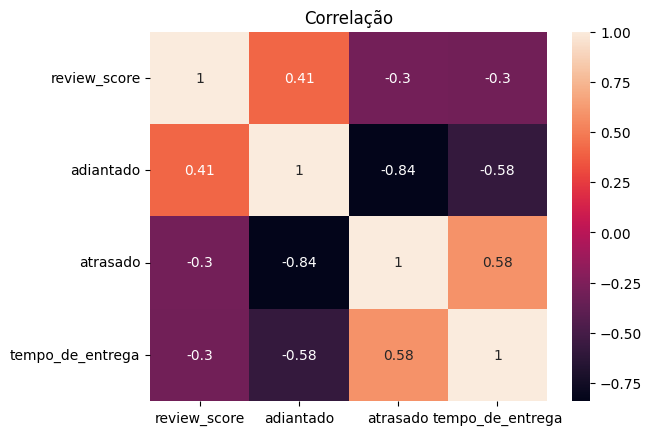

In [51]:
#Calcula a matriz de correlação para as variaveis numéricas no df, criando uma tabela de correlação
df_correlation = df[['review_score', 'adiantado', 'atrasado', 'tempo_de_entrega']].corr()

#Exibe a tabela de correlação 
print('\n\nMatriz de correlação: ')
display(df_correlation)

#Cria um mapa de calor para visualizar a matrix de correlação
sns.heatmap(df_correlation,
            annot=True,
            xticklabels=df_correlation.columns,
            yticklabels=df_correlation.columns)

plt.title('Correlação')
plt.show()

Podemos ver que existe uma relação significativa entre o tempo de entrega e a nota dada pelo comprador.

Vamos verificar as colunas com as informações do review, para saber se existe correlação entre a nota e o texto escrito.

In [64]:
def possui_caracteres_especiais(texto):
    try:
        # Tenta codificar o texto como UTF-8
        texto.encode('utf-8')
        return 0  # Retorna 0 se o texto está dentro do padrão UTF-8
    except:
        return 1  # Retorna 1 se o texto contém caracteres especiais

# Criar as colunas de tamanho das strings
df['review_comment_title_size'] = df['review_comment_title'].str.len()
df['review_comment_message_size'] = df['review_comment_message'].str.len()

# Criar as colunas de verificação de caracteres especiais com 1 e 0
df['review_comment_title_caracteres_especiais'] = df['review_comment_title'].apply(lambda x: 1 if possui_caracteres_especiais(x) else 0)
df['review_comment_message_caracteres_especiais'] = df['review_comment_message'].apply(lambda x: 1 if possui_caracteres_especiais(x) else 0)



Matriz de correlação: 


,review_score,review_comment_title_size,review_comment_message_size,review_comment_title_caracteres_especiais,review_comment_message_caracteres_especiais
review_score,1.000000,-0.308558,-0.391831,0.051307,0.296681
review_comment_title_size,-0.308558,1.000000,0.309450,NaN,-0.107684
review_comment_message_size,-0.391831,0.309450,1.000000,-0.003652,NaN
review_comment_title_caracteres_especiais,0.051307,NaN,-0.003652,1.000000,0.321150
review_comment_message_caracteres_especiais,0.296681,-0.107684,NaN,0.321150,1.000000


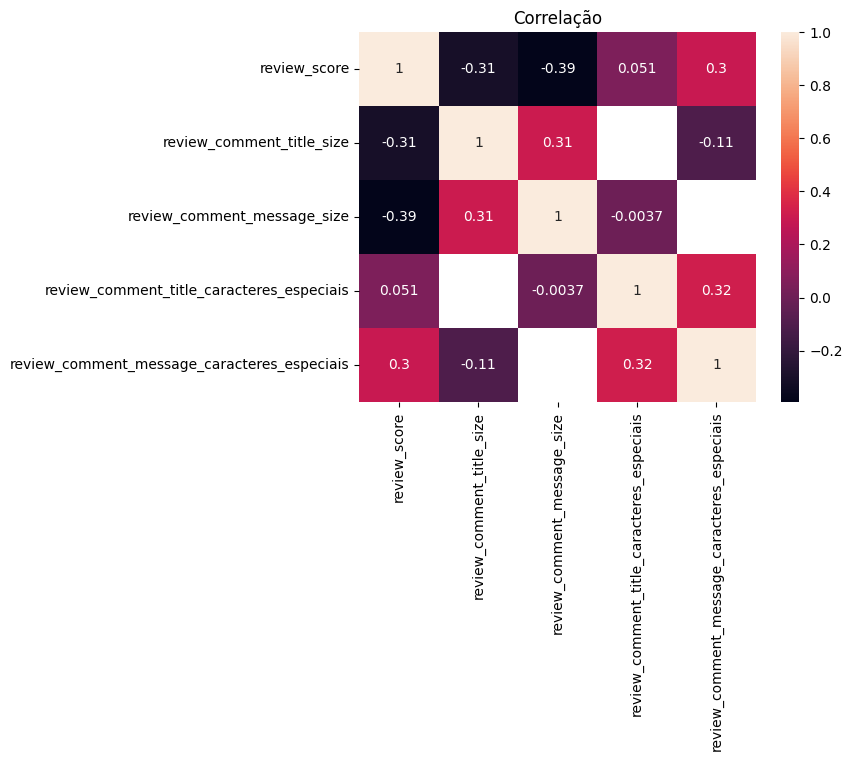

In [65]:
#Calcula a matriz de correlação para as variaveis numéricas no df, criando uma tabela de correlação
df_correlation = df[['review_score', 'review_comment_title_size', 'review_comment_message_size', 'review_comment_title_caracteres_especiais', 'review_comment_message_caracteres_especiais']].corr()

#Exibe a tabela de correlação 
print('\n\nMatriz de correlação: ')
display(df_correlation)

#Cria um mapa de calor para visualizar a matrix de correlação
sns.heatmap(df_correlation,
            annot=True,
            xticklabels=df_correlation.columns,
            yticklabels=df_correlation.columns)

plt.title('Correlação')
plt.show()

Concluímos que não existe uma relação tão significante entre o comentário e a nota quanto entre a nota e o tempo de entrega.

Por último, vamos usar uma biblioteca de análise de sentimento para dizer se o comentário é positivo (1) ou negativo (0), para tentar criar uma última correlação entre a nota obtida e o comentário.<br>
Essa biblioteca em específico tem uma função para realizar essa tarefa.

In [67]:
def is_positive(comment):
    if pd.isna(comment):
        return 0
    analysis = TextBlob(comment)
    return 1 if analysis.sentiment.polarity > 0 else 0

# Aplicar a função nas colunas de comentários
df['comentario_positivo'] = df['review_comment_message'].apply(is_positive)



Matriz de correlação: 


,review_score,comentario_positivo
review_score,1.000000,0.034827
comentario_positivo,0.034827,1.000000


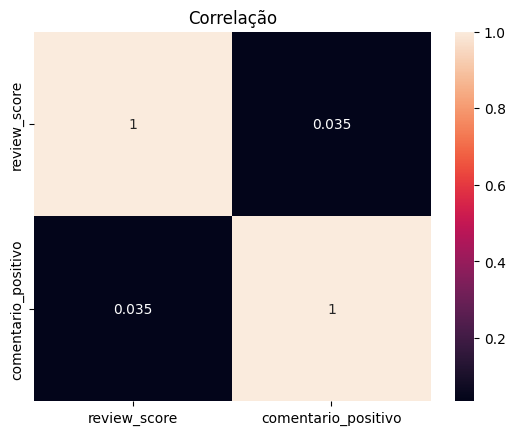

In [73]:
#Calcula a matriz de correlação para as variaveis numéricas no df, criando uma tabela de correlação
df_correlation = df[['review_score', 'comentario_positivo']].corr()

#Exibe a tabela de correlação 
print('\n\nMatriz de correlação: ')
display(df_correlation)

#Cria um mapa de calor para visualizar a matrix de correlação
sns.heatmap(df_correlation,
            annot=True,
            xticklabels=df_correlation.columns,
            yticklabels=df_correlation.columns)

plt.title('Correlação')
plt.show()

Mesmo com a correlação sendo muito baixa, isso pode ser devido ao excesso de emojis utilizados pelos usuários, o que dificulda o trabalho do LLM de identificar a positividade do comentário.